# 파이썬 성능 높이기 by 가브리엘레 라나로(Gabriele Lanaro)
### 2019.05.28.(화) 19:16

1. 클래스에 __init__ 메서드를 사용하는 상황을 알게 되었다.
2. 아래와 다소 복잡해 보이는 순서에 따라서 전체 코드가 실행되는데,
Particle class -> ParticleSimulator class -> visualize function -> test_visualize
이 구조를 유창하게 사용할 수 있게 되면, 더욱 유지보수 및 관리가 용이한 코드를 만드는데 도움이 될 것이다.


X: [0.0]
Y: [0.5]
line Line2D(_line0)
type line <class 'matplotlib.lines.Line2D'>
type(anim) <class 'matplotlib.animation.FuncAnimation'>


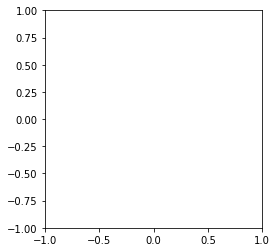

In [41]:
class Particle:
    def __init__(self, x, y, ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel    # __init__ 메서드에 @ self변수를 생성하면, 
                                  # 클래스의 인스턴트를 생성할 때 넣어주는 매개변수 값이
                                  #  __init__ 메서드의 변수에 할당된다.
        
class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles
    
    def evolve(self, dt):
        timestep = 0.00001
        nsteps = int(dt/timestep)
        
        for i in range(nsteps):
            for p in self.particles:
                # 1. 방향을 계산한다.
                norm = (p.x**2 + p.y**2)**0.5
                v_x = -p.y/norm
                v_y = p.x/norm
                
                # 2. 변위를 계산한다
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y
                
                p.x += d_x
                p.y += d_y
                # 3. 모든 시간 단계를 반복한다.
                
import matplotlib.pyplot as plt
from matplotlib import animation as anime

def visualize(simulator):
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]
    print('X:', X)
    print('Y:', Y)
    fig = plt.figure()
    ax = plt.subplot(111, aspect='equal')
    line, = ax.plot(X, Y, 'ro')
    print('line', line)
    print('type line', type(line))
    
    # 축 한계
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    
    # 이 코드는 애니메이션이 시작할 때 실행될 것이다.
    def init():
        line.set_data([], [])
        return line, # 쉼표가 중요하다!    , tuple 형태로 반환한다.
    
    def animate(i):
        # 0.01 시간 단위만큼 입자를 진전시킨다
        simulator.evolve(0.01)
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]
        
        line.set_data(X, Y)
        return line,    
    
    # animate 함수를 10ms마다 호출한다
#     anim = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
    anim = anime.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
    print('type(anim)', type(anim))
    plt.plot()
    plt.show()

def test_visualize():
    particles = [Particle(0.0, 0.5, 1),]
#                 Particle(0.0, -0.5, -1),
#                 Particle(-0.1, -0.4, 3)]
    simulator = ParticleSimulator(particles)
    visualize(simulator)
    
if __name__ == '__main__':
    test_visualize()

In [24]:
def __init__(x, y, a, b):
    print(x, y)
    return x,
type(__init__(1, 2, 3, 4))
len(__init__(1, 2, 3, 4))

1 2
1 2


1

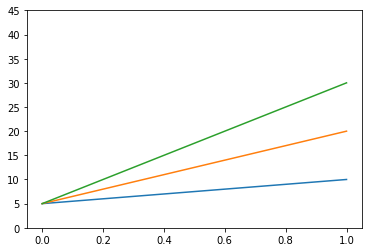

In [59]:
x = 5
plt.ylim(0, 45)
plt.plot([[x, x, x], [10, 20, 30]])
# plt.show()

In [61]:
def test_evolve():
    particles = [Particle(0.3, 0.5, 1),
                Particle(0.0, -0.5, -1),
                Particle(-0.1, -0.4, 3)]
    
    simulator = ParticleSimulator(particles)
    
    simulator.evolve(0.1)
    
    p0, p1, p2 = particles
    
    def fequal(a, b, eps=1e-5):
        return abs(a-b) < eps
    
    assert fequal(p0.x, 0.210269)
    assert fequal(p0.y, 0.543863)
    
    assert fequal(p1.x, -0.099334)
    assert fequal(p1.y, -0.490034)
    
    assert fequal(p2.x, 0.191358)
    assert fequal(p2.y, -0.365227)
    
if __name__ == '__main__':
    test_evolve()

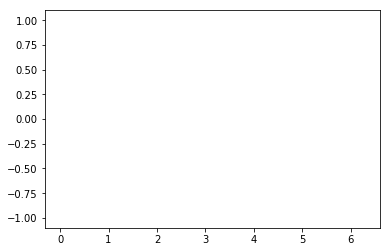

In [62]:
"""
A simple example of an animated plot
"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

fig, ax = plt.subplots()

x = np.arange(0, 2*np.pi, 0.01)
line, = ax.plot(x, np.sin(x))


def animate(i):
    line.set_ydata(np.sin(x + i/10.0))  # update the data
    return line,


# Init only required for blitting to give a clean slate.
def init():
    line.set_ydata(np.ma.array(x, mask=True))
    return line,

ani = animation.FuncAnimation(fig, animate, np.arange(1, 200), init_func=init,
                              interval=25, blit=True)
plt.show()

In [65]:
class Particle:
    def __init__(self, x, y, ang_vel):
        self.x = x
        self.y = y
        self.ang_vel = ang_vel    #
        
class ParticleSimulator:
    def __init__(self, particles):
        self.particles = particles
    
    def evolve(self, dt):
        timestep = 0.01
        nsteps = int(dt/timestep)
        print('timestep:', timestep, 'dt:', dt)
        print('res:', dt/timestep, 'nsteps:', nsteps)

        for i in range(nsteps):
            for p in self.particles:
                norm = (p.x**2 + p.y**2)**0.5
                v_x = -p.y/norm
                v_y = p.x/norm
                
                d_x = timestep * p.ang_vel * v_x
                d_y = timestep * p.ang_vel * v_y
                
                p.x += d_x
                p.y += d_y
                
import matplotlib.pyplot as plt
from matplotlib import animation as anime

def visualize(simulator):
    X = [p.x for p in simulator.particles]
    Y = [p.y for p in simulator.particles]
    print('X:', X)
    print('Y:', Y)
    fig = plt.figure()
    ax = plt.subplot(111, aspect='equal')
    line, = ax.plot(X, Y, 'ro')
    print('line', line)
    print('type line', type(line))
    
    plt.xlim(-1, 1)
    plt.ylim(-1, 1)
    
    def init():
        line.set_data([], [])
        return line, #
    
    def animate(i):
        simulator.evolve(0.1)
        X = [p.x for p in simulator.particles]
        Y = [p.y for p in simulator.particles]
        
        line.set_data(X, Y)
        return line,    
    
#     anim = matplotlib.animation.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
    anim = anime.FuncAnimation(fig, animate, init_func=init, blit=True, interval=10)
    print('type(anim)', type(anim))
    plt.plot()
    plt.show()

def test_visualize():
    particles = [Particle(0.3, 0.5, 1),
                Particle(0.0, -0.5, -1),
                Particle(-0.1, -0.4, 3)]
    simulator = ParticleSimulator(particles)
    visualize(simulator)
    
if __name__ == '__main__':
    test_visualize()
    
    
    
def test_evolve():
    particles = [Particle(0.3, 0.5, 1),
                Particle(0.0, -0.5, -1),
                Particle(-0.1, -0.4, 3)]
    
    simulator = ParticleSimulator(particles)
    
    simulator.evolve(0.1)
    
    p0, p1, p2 = particles
    
    def fequal(a, b, eps=1e-5):
        return abs(a-b) < eps
    
    assert fequal(p0.x, 0.210269)
    assert fequal(p0.y, 0.543863)
    
    assert fequal(p1.x, -0.099334)
    assert fequal(p1.y, -0.490034)
    
    assert fequal(p2.x, 0.191358)
    assert fequal(p2.y, -0.365227)
    
if __name__ == '__main__':
    test_evolve()

timestep: 0.01 dt: 0.1
nsteps: 10


AssertionError: 